In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
goals_df = pd.read_csv("cleaned_goals.csv").drop_duplicates()
shots_df = pd.read_csv("cleaned_shots.csv").drop_duplicates()
players_df = pd.read_csv("sorted_players.csv").drop_duplicates()

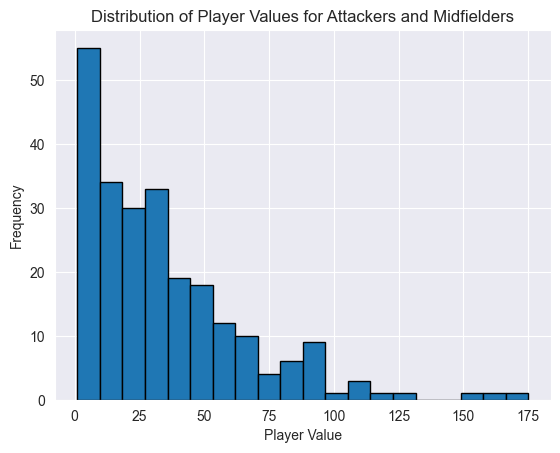

In [5]:
player_goals = goals_df.groupby("player1_id")["goal_number"].count().reset_index()
player_goals.columns = ["player_id", "total_goals"]

player_assists = goals_df.groupby("player2_id")["goal_number"].count().reset_index()
player_assists.columns = ["player_id", "total_assists"]

shots_df.rename(columns={"player1_id": "player_id"}, inplace=True)

player_shots = shots_df.groupby("player_id")["shot_number"].count().reset_index()
player_shots.columns = ["player_id", "total_shots"]

In [ ]:
player_performance = players_df.merge(player_goals, on="player_id", how="left") \
                                       .merge(player_assists, on="player_id", how="left") \
                                       .merge(player_shots, on="player_id", how="left")

In [ ]:
player_performance.fillna(0, inplace=True)

In [ ]:
player_performance = player_performance.drop_duplicates(subset=["player_id"])

In [ ]:
player_performance["player_value"] = 0

# Apply weighted sum formula only to attackers and midfielders
player_performance.loc[player_performance["Position"].isin(["Attacker", "Midfielder"]), "player_value"] = (
    player_performance["total_goals"] * 5 +  # Goals have high weight
    player_performance["total_assists"] * 3 +  # Assists contribute significantly
    player_performance["total_shots"] * 1  # Shots have minimal impact
)

In [ ]:
most_valuable_players = player_performance.nlargest(10, "player_value")
least_valuable_players = player_performance.nsmallest(10, "player_value")

In [ ]:
# Identifying top 10 best/worst players per category
best_attackers = player_performance[player_performance["Position"] == "Attacker"].nlargest(10, "player_value")
worst_attackers = player_performance[player_performance["Position"] == "Attacker"].nsmallest(10, "player_value")

best_midfielders = player_performance[player_performance["Position"] == "Midfielder"].nlargest(10, "player_value")
worst_midfielders = player_performance[player_performance["Position"] == "Midfielder"].nsmallest(10, "player_value")

best_defenders = player_performance[player_performance["Position"] == "Defender"].nlargest(10, "player_value")
worst_defenders = player_performance[player_performance["Position"] == "Defender"].nsmallest(10, "player_value")

best_goalkeepers = player_performance[player_performance["Position"] == "Goalkeeper"].nlargest(10, "player_value")
worst_goalkeepers = player_performance[player_performance["Position"] == "Goalkeeper"].nsmallest(10, "player_value")

In [ ]:
# Visualizing player value distribution
plt.hist(player_performance[player_performance["player_value"] > 0]["player_value"], bins=20, edgecolor="black")
plt.xlabel("Player Value")
plt.ylabel("Frequency")
plt.title("Distribution of Player Values for Attackers and Midfielders")
plt.show()

In [6]:
best_attackers

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_kicking,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value
1,37412,90.0,89.0,92.0,86.0,90.0,85.0,78.0,63.0,83.0,...,6.0,11.0,14.0,2015-10-16,88,Attacker,17.0,8.0,66.0,175
507,187266,82.0,66.0,71.0,74.0,83.0,83.0,59.0,46.0,61.0,...,7.0,9.0,13.0,2015-11-06,75,Attacker,14.0,6.0,75.0,163
19,50047,85.0,88.0,89.0,85.0,85.0,82.0,80.0,73.0,78.0,...,15.0,12.0,13.0,2015-12-24,86,Attacker,11.0,8.0,71.0,150
279,194165,83.0,77.0,69.0,76.0,84.0,81.0,74.0,63.0,72.0,...,11.0,14.0,11.0,2015-12-24,78,Attacker,13.0,4.0,50.0,127
4,107417,83.0,94.0,93.0,87.0,86.0,79.0,85.0,82.0,86.0,...,6.0,8.0,8.0,2015-09-25,88,Attacker,10.0,9.0,39.0,116
63,19243,90.0,82.0,75.0,78.0,89.0,83.0,65.0,48.0,74.0,...,12.0,8.0,11.0,2015-10-16,82,Attacker,15.0,3.0,29.0,113
124,181276,84.0,76.0,80.0,85.0,81.0,85.0,67.0,58.0,69.0,...,14.0,7.0,10.0,2015-12-10,81,Attacker,4.0,5.0,64.0,99
610,46469,83.0,69.0,61.0,64.0,84.0,84.0,76.0,56.0,75.0,...,11.0,6.0,5.0,2015-09-21,73,Attacker,12.0,3.0,26.0,95
906,41280,79.0,64.0,54.0,55.0,82.0,81.0,65.0,64.0,69.0,...,14.0,13.0,9.0,2015-09-21,68,Attacker,9.0,2.0,44.0,95
178,214426,79.0,78.0,89.0,83.0,79.0,73.0,69.0,61.0,68.0,...,12.0,16.0,6.0,2015-10-23,79,Attacker,8.0,4.0,41.0,93


In [12]:
best_midfielders

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
2,37459,72.0,87.0,79.0,68.0,83.0,71.0,92.0,85.0,93.0,...,1.0,1.0,2015-09-21,88,Midfielder,11.0,7.0,32.0,108,1.329885
43,184536,70.0,87.0,89.0,77.0,76.0,79.0,85.0,78.0,87.0,...,14.0,6.0,2015-09-21,83,Midfielder,5.0,5.0,66.0,106,1.305258
5,30613,78.0,81.0,65.0,62.0,81.0,77.0,93.0,92.0,93.0,...,15.0,15.0,2015-10-02,87,Midfielder,3.0,18.0,26.0,95,1.169807
18,37436,77.0,87.0,79.0,68.0,82.0,78.0,86.0,84.0,85.0,...,7.0,15.0,2015-09-21,86,Midfielder,1.0,11.0,53.0,91,1.120552
125,30829,86.0,79.0,72.0,74.0,87.0,87.0,80.0,85.0,83.0,...,8.0,7.0,2015-10-23,81,Midfielder,8.0,5.0,35.0,90,1.108238
263,157729,78.0,76.0,67.0,67.0,78.0,82.0,80.0,75.0,84.0,...,15.0,12.0,2015-11-06,78,Midfielder,4.0,10.0,34.0,84,1.034355
355,30892,67.0,77.0,76.0,75.0,73.0,81.0,76.0,76.0,78.0,...,16.0,9.0,2015-09-21,77,Midfielder,6.0,8.0,30.0,84,1.034355
40,157723,75.0,84.0,80.0,74.0,75.0,78.0,84.0,82.0,85.0,...,7.0,6.0,2015-11-06,84,Midfielder,5.0,2.0,51.0,82,1.009728
81,128864,75.0,84.0,78.0,77.0,81.0,76.0,85.0,82.0,85.0,...,12.0,12.0,2015-10-16,82,Midfielder,4.0,8.0,38.0,82,1.009728
131,36615,82.0,81.0,69.0,80.0,81.0,86.0,86.0,83.0,85.0,...,12.0,8.0,2015-10-16,80,Midfielder,7.0,1.0,37.0,75,0.923532


In [13]:
best_defenders

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
7,35606,36.0,39.0,29.0,33.0,43.0,71.0,71.0,58.0,58.0,...,12.0,8.0,2015-10-30,87,Defender,0.0,1.0,8.0,0,0.0
9,31306,57.0,58.0,63.0,66.0,61.0,73.0,68.0,56.0,57.0,...,11.0,13.0,2015-10-16,87,Defender,4.0,5.0,15.0,0,0.0
10,36183,34.0,67.0,74.0,83.0,47.0,79.0,75.0,81.0,74.0,...,6.0,5.0,2015-11-26,87,Defender,0.0,0.0,0.0,0,0.0
11,38818,42.0,58.0,69.0,67.0,51.0,76.0,79.0,75.0,68.0,...,5.0,5.0,2015-11-06,87,Defender,0.0,0.0,0.0,0,0.0
12,174321,53.0,43.0,74.0,76.0,49.0,69.0,64.0,66.0,45.0,...,11.0,12.0,2015-09-21,86,Defender,0.0,0.0,0.0,0,0.0
14,30509,49.0,74.0,72.0,73.0,71.0,66.0,72.0,64.0,66.0,...,7.0,5.0,2015-09-21,86,Defender,1.0,4.0,6.0,0,0.0
15,23783,56.0,58.0,69.0,77.0,45.0,63.0,65.0,61.0,56.0,...,5.0,12.0,2015-12-10,86,Defender,1.0,1.0,15.0,0,0.0
16,30627,46.0,45.0,33.0,34.0,38.0,61.0,66.0,64.0,59.0,...,15.0,8.0,2015-09-21,86,Defender,5.0,0.0,8.0,0,0.0
24,39027,45.0,64.0,68.0,70.0,41.0,76.0,65.0,66.0,59.0,...,8.0,6.0,2015-09-21,85,Defender,0.0,0.0,1.0,0,0.0
26,72541,46.0,70.0,79.0,79.0,64.0,68.0,80.0,74.0,68.0,...,6.0,5.0,2015-10-16,85,Defender,0.0,3.0,4.0,0,0.0


In [14]:
best_goalkeepers

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
22,182917,13.0,13.0,51.0,55.0,12.0,31.0,31.0,32.0,17.0,...,83.0,89.0,2015-09-21,85,Goalkeeper,0.0,0.0,0.0,0,0.0
56,31432,14.0,23.0,59.0,60.0,14.0,65.0,32.0,35.0,42.0,...,84.0,88.0,2015-10-09,82,Goalkeeper,0.0,0.0,0.0,0,0.0
57,170323,14.0,13.0,46.0,52.0,13.0,36.0,32.0,31.0,44.0,...,86.0,88.0,2015-09-21,82,Goalkeeper,0.0,0.0,0.0,0,0.0
100,30859,12.0,12.0,45.0,52.0,13.0,21.0,35.0,33.0,17.0,...,83.0,84.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
111,26295,10.0,10.0,65.0,63.0,10.0,23.0,27.0,31.0,16.0,...,81.0,88.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
126,32657,12.0,12.0,60.0,55.0,12.0,29.0,27.0,36.0,38.0,...,85.0,83.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
141,30660,14.0,10.0,50.0,63.0,13.0,24.0,19.0,22.0,65.0,...,80.0,81.0,2015-12-10,80,Goalkeeper,0.0,0.0,0.0,0,0.0
164,46518,12.0,16.0,52.0,58.0,11.0,28.0,26.0,32.0,31.0,...,80.0,84.0,2015-10-16,80,Goalkeeper,0.0,0.0,0.0,0,0.0
189,31465,13.0,13.0,50.0,48.0,13.0,26.0,33.0,30.0,52.0,...,81.0,82.0,2015-09-21,79,Goalkeeper,0.0,0.0,0.0,0,0.0
190,37193,14.0,18.0,57.0,59.0,10.0,23.0,39.0,35.0,19.0,...,79.0,84.0,2015-09-21,79,Goalkeeper,0.0,0.0,0.0,0,0.0


In [15]:
worst_attackers

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
0,30893,95.0,93.0,91.0,93.0,93.0,94.0,81.0,72.0,81.0,...,14.0,11.0,2015-10-16,93,Attacker,0.0,0.0,0.0,0,0.0
3,38817,88.0,87.0,90.0,85.0,91.0,90.0,79.0,61.0,80.0,...,2.0,4.0,2015-09-21,88,Attacker,0.0,0.0,0.0,0,0.0
6,31921,81.0,87.0,93.0,95.0,83.0,87.0,84.0,80.0,77.0,...,5.0,6.0,2015-12-03,87,Attacker,0.0,0.0,0.0,0,0.0
8,40636,90.0,88.0,88.0,78.0,91.0,88.0,82.0,64.0,84.0,...,33.0,37.0,2015-10-16,87,Attacker,0.0,0.0,0.0,0,0.0
27,303824,74.0,86.0,91.0,90.0,80.0,88.0,74.0,68.0,75.0,...,12.0,10.0,2015-09-21,85,Attacker,0.0,0.0,0.0,0,0.0
38,41157,81.0,87.0,87.0,86.0,80.0,80.0,73.0,71.0,70.0,...,7.0,5.0,2015-11-06,84,Attacker,0.0,0.0,0.0,0,0.0
48,37799,79.0,79.0,93.0,89.0,84.0,81.0,76.0,60.0,75.0,...,16.0,9.0,2015-09-21,83,Attacker,0.0,0.0,0.0,0,0.0
54,212867,81.0,83.0,85.0,86.0,80.0,82.0,75.0,53.0,69.0,...,6.0,10.0,2015-10-02,82,Attacker,0.0,0.0,0.0,0,0.0
65,176300,74.0,85.0,90.0,84.0,77.0,84.0,79.0,75.0,79.0,...,11.0,11.0,2015-12-10,82,Attacker,0.0,0.0,0.0,0,0.0
67,46120,76.0,86.0,87.0,85.0,77.0,81.0,81.0,67.0,82.0,...,6.0,13.0,2015-10-16,82,Attacker,0.0,0.0,0.0,0,0.0


In [16]:
worst_midfielders

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
13,169200,82.0,85.0,76.0,78.0,83.0,84.0,88.0,82.0,88.0,...,10.0,13.0,2015-09-21,86,Midfielder,0.0,0.0,0.0,0,0.0
21,31097,71.0,86.0,78.0,74.0,79.0,73.0,86.0,83.0,89.0,...,14.0,9.0,2015-10-16,85,Midfielder,0.0,0.0,0.0,0,0.0
32,30889,56.0,77.0,32.0,33.0,77.0,81.0,92.0,93.0,88.0,...,10.0,10.0,2015-09-21,84,Midfielder,0.0,0.0,0.0,0,0.0
36,40945,75.0,87.0,86.0,82.0,79.0,85.0,81.0,83.0,82.0,...,6.0,6.0,2015-12-17,84,Midfielder,0.0,0.0,0.0,0,0.0
39,38433,68.0,80.0,74.0,68.0,76.0,76.0,88.0,86.0,87.0,...,8.0,7.0,2015-12-03,84,Midfielder,0.0,0.0,0.0,0,0.0
44,27365,63.0,81.0,59.0,50.0,68.0,72.0,83.0,86.0,85.0,...,12.0,11.0,2015-11-06,83,Midfielder,0.0,0.0,0.0,0,0.0
55,30872,76.0,79.0,51.0,53.0,80.0,84.0,87.0,87.0,86.0,...,13.0,11.0,2015-09-21,82,Midfielder,0.0,0.0,0.0,0,0.0
64,25496,73.0,83.0,79.0,75.0,77.0,77.0,82.0,84.0,83.0,...,14.0,12.0,2015-09-21,82,Midfielder,0.0,0.0,0.0,0,0.0
82,38239,70.0,88.0,85.0,83.0,75.0,83.0,78.0,72.0,79.0,...,5.0,15.0,2015-10-09,82,Midfielder,0.0,0.0,0.0,0,0.0
84,27430,84.0,82.0,56.0,63.0,83.0,83.0,85.0,76.0,82.0,...,8.0,15.0,2015-09-21,82,Midfielder,0.0,0.0,0.0,0,0.0


In [17]:
worst_defenders

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
7,35606,36.0,39.0,29.0,33.0,43.0,71.0,71.0,58.0,58.0,...,12.0,8.0,2015-10-30,87,Defender,0.0,1.0,8.0,0,0.0
9,31306,57.0,58.0,63.0,66.0,61.0,73.0,68.0,56.0,57.0,...,11.0,13.0,2015-10-16,87,Defender,4.0,5.0,15.0,0,0.0
10,36183,34.0,67.0,74.0,83.0,47.0,79.0,75.0,81.0,74.0,...,6.0,5.0,2015-11-26,87,Defender,0.0,0.0,0.0,0,0.0
11,38818,42.0,58.0,69.0,67.0,51.0,76.0,79.0,75.0,68.0,...,5.0,5.0,2015-11-06,87,Defender,0.0,0.0,0.0,0,0.0
12,174321,53.0,43.0,74.0,76.0,49.0,69.0,64.0,66.0,45.0,...,11.0,12.0,2015-09-21,86,Defender,0.0,0.0,0.0,0,0.0
14,30509,49.0,74.0,72.0,73.0,71.0,66.0,72.0,64.0,66.0,...,7.0,5.0,2015-09-21,86,Defender,1.0,4.0,6.0,0,0.0
15,23783,56.0,58.0,69.0,77.0,45.0,63.0,65.0,61.0,56.0,...,5.0,12.0,2015-12-10,86,Defender,1.0,1.0,15.0,0,0.0
16,30627,46.0,45.0,33.0,34.0,38.0,61.0,66.0,64.0,59.0,...,15.0,8.0,2015-09-21,86,Defender,5.0,0.0,8.0,0,0.0
24,39027,45.0,64.0,68.0,70.0,41.0,76.0,65.0,66.0,59.0,...,8.0,6.0,2015-09-21,85,Defender,0.0,0.0,1.0,0,0.0
26,72541,46.0,70.0,79.0,79.0,64.0,68.0,80.0,74.0,68.0,...,6.0,5.0,2015-10-16,85,Defender,0.0,3.0,4.0,0,0.0


In [18]:
worst_goalkeepers

,player_id,finishing,dribbling,acceleration,sprint_speed,positioning,shot_power,short_passing,long_passing,vision,...,gk_positioning,gk_reflexes,date,FIFA_rating,Position,total_goals,total_assists,total_shots,player_value,player_value_percentage
22,182917,13.0,13.0,51.0,55.0,12.0,31.0,31.0,32.0,17.0,...,83.0,89.0,2015-09-21,85,Goalkeeper,0.0,0.0,0.0,0,0.0
56,31432,14.0,23.0,59.0,60.0,14.0,65.0,32.0,35.0,42.0,...,84.0,88.0,2015-10-09,82,Goalkeeper,0.0,0.0,0.0,0,0.0
57,170323,14.0,13.0,46.0,52.0,13.0,36.0,32.0,31.0,44.0,...,86.0,88.0,2015-09-21,82,Goalkeeper,0.0,0.0,0.0,0,0.0
100,30859,12.0,12.0,45.0,52.0,13.0,21.0,35.0,33.0,17.0,...,83.0,84.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
111,26295,10.0,10.0,65.0,63.0,10.0,23.0,27.0,31.0,16.0,...,81.0,88.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
126,32657,12.0,12.0,60.0,55.0,12.0,29.0,27.0,36.0,38.0,...,85.0,83.0,2015-09-21,81,Goalkeeper,0.0,0.0,0.0,0,0.0
141,30660,14.0,10.0,50.0,63.0,13.0,24.0,19.0,22.0,65.0,...,80.0,81.0,2015-12-10,80,Goalkeeper,0.0,0.0,0.0,0,0.0
164,46518,12.0,16.0,52.0,58.0,11.0,28.0,26.0,32.0,31.0,...,80.0,84.0,2015-10-16,80,Goalkeeper,0.0,0.0,0.0,0,0.0
189,31465,13.0,13.0,50.0,48.0,13.0,26.0,33.0,30.0,52.0,...,81.0,82.0,2015-09-21,79,Goalkeeper,0.0,0.0,0.0,0,0.0
190,37193,14.0,18.0,57.0,59.0,10.0,23.0,39.0,35.0,19.0,...,79.0,84.0,2015-09-21,79,Goalkeeper,0.0,0.0,0.0,0,0.0
